In [1]:
# Import all the the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("C:/Users/tejad/OneDrive/Desktop/HEALTH\Heart_Disease.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df['target'][df['target'] == 'Absence'] = 0
df['target'][df['target'] == 'Presence'] = 1

C:\Users\tejad\AppData\Local\Temp\ipykernel_17816\2456069372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['target'] == 'Absence'] = 0
C:\Users\tejad\AppData\Local\Temp\ipykernel_17816\2456069372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['target'] == 'Presence'] = 1


In [6]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')
df['target'] = df['target'].astype('int64')

In [7]:
df.shape

(270, 14)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [11]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

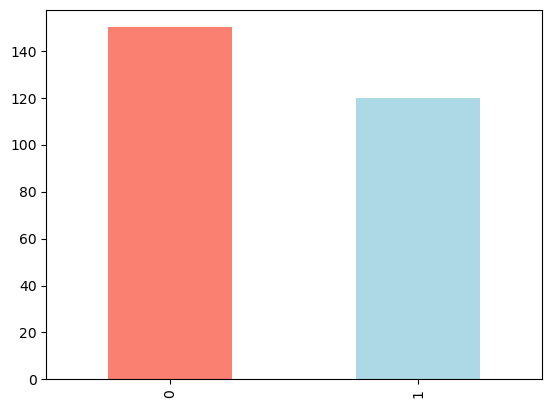

In [12]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    object 
 2   cp        270 non-null    object 
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    object 
 6   restecg   270 non-null    object 
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    object 
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    object 
 11  ca        270 non-null    int64  
 12  thal      270 non-null    object 
 13  target    270 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 29.7+ KB


In [14]:
# Are there any messing data ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,0.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,1.000000


In [16]:
df.sex.value_counts()

1    183
0     87
Name: sex, dtype: int64

In [17]:
# Compare traget column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,67,83
1,20,100


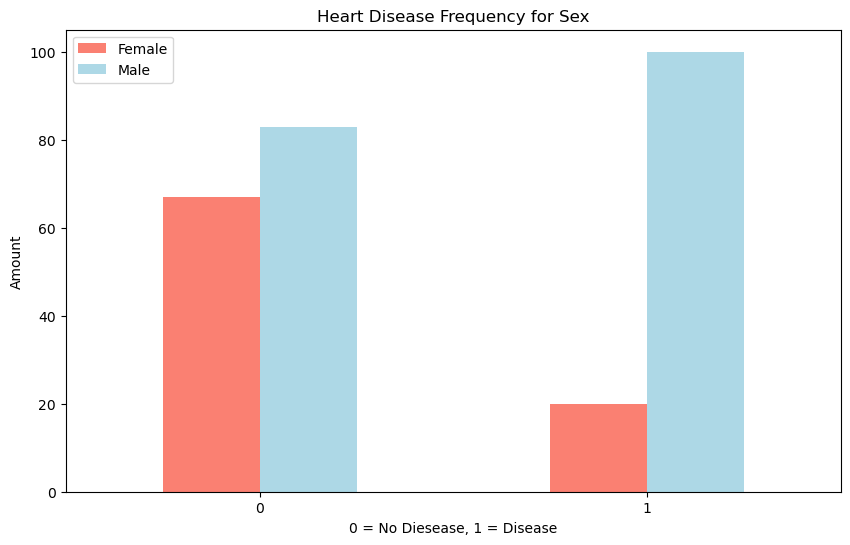

In [18]:
# Create a plot o crossbar
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Diesease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female',"Male"])
plt.xticks(rotation=0);

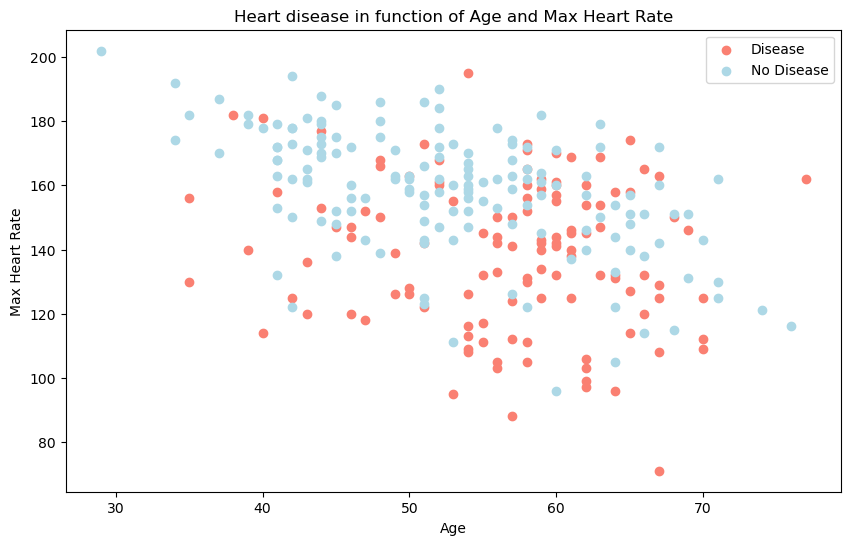

In [19]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positivie examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')

# Add some helpful info
plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

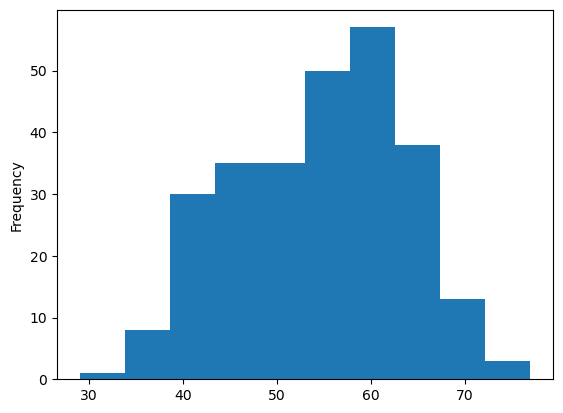

In [20]:
# Check the distribution of the age column with histogram
df['age'].plot.hist();

In [21]:
 pd.crosstab(df.cp,df.target)

target,0,1
cp,,
1,15,5
2,35,7
3,62,17
4,38,91


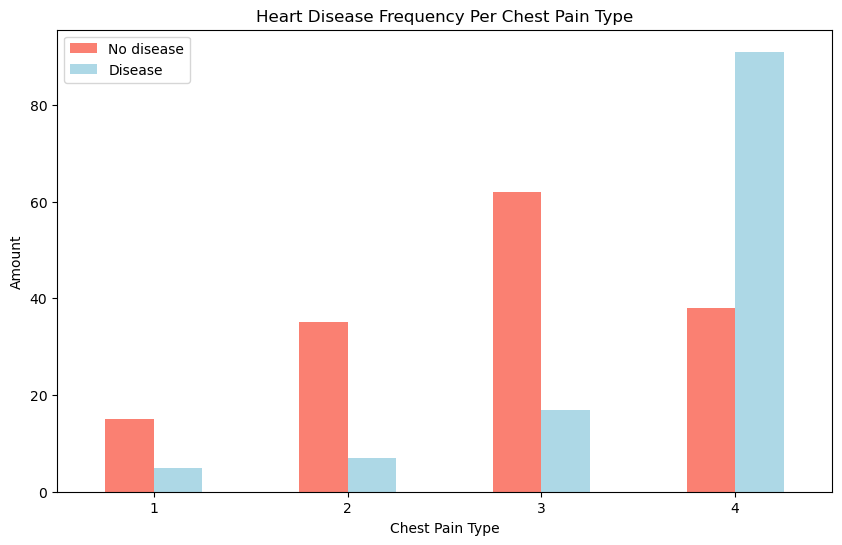

In [22]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

In [23]:
# Make a correlation matrix
df.corr()

,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000000,0.273053,0.220056,-0.402215,0.194234,0.356081,0.212322
trestbps,0.273053,1.000000,0.173019,-0.039136,0.222800,0.085697,0.155383
chol,0.220056,0.173019,1.000000,-0.018739,0.027709,0.126541,0.118021
thalach,-0.402215,-0.039136,-0.018739,1.000000,-0.349045,-0.265333,-0.418514
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000,0.255005,0.417967
ca,0.356081,0.085697,0.126541,-0.265333,0.255005,1.000000,0.455336
target,0.212322,0.155383,0.118021,-0.418514,0.417967,0.455336,1.000000


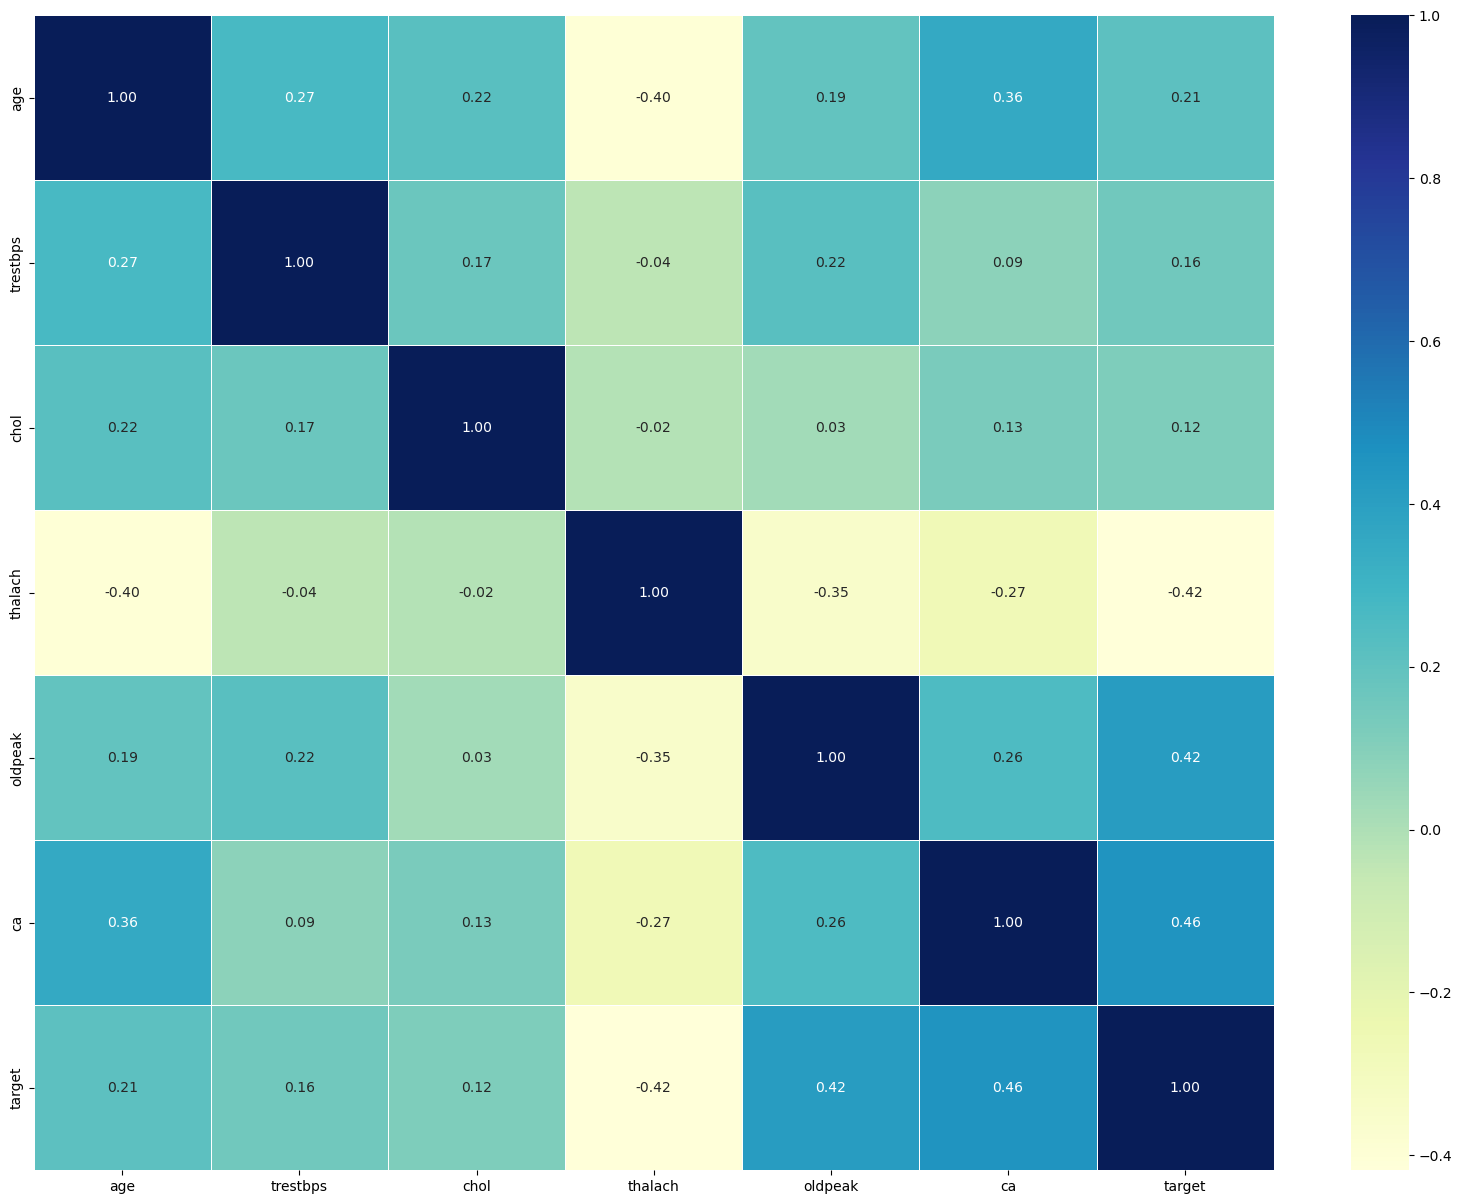

In [24]:
# Let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(20,15))
ax= sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt="0.2f", cmap="YlGnBu")

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [26]:
# Split data into X and y
X= df.drop('target',axis=1)
y= df['target']

In [27]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [29]:
# Split data into train and test sets

np.random.seed(42)

# Split into train & test sets

X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape

(216, 13)

In [31]:
X_test.shape

(54, 13)

In [32]:
# Put models in a dictionary 
models= {'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learing models.
    models: a dict of diffrent Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test: training labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep scores
    models_score={}
    # Loo through models
    for name, model in models.items():
        # Fit the model
        print(f"Training {name} ...")
        model.fit(X_train, y_train)
        # Evaluating the model and append its score to model_scores
        print(f"Scorring {name} ...")
        models_score[name]=model.score(X_test,y_test)
    return models_score

In [33]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

Training Logistic Regression ...
Scorring Logistic Regression ...
Training KNN ...
Scorring KNN ...
Training Random Forest ...
Scorring Random Forest ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

{'Logistic Regression': 0.9074074074074074,
 'KNN': 0.6481481481481481,
 'Random Forest': 0.7962962962962963}

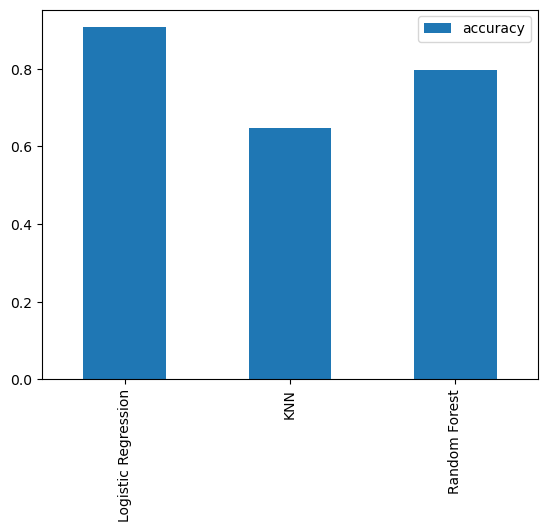

In [34]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

In [35]:
# Try feature scalling
from sklearn.preprocessing import MinMaxScaler
min_max_scaller=MinMaxScaler()
norm=min_max_scaller.fit(X)
X_train_norm=norm.transform(X_train)
X_test_norm=norm.transform(X_test)
fit_and_score(models,X_train_norm,X_test_norm,y_train,y_test)

Training Logistic Regression ...
Scorring Logistic Regression ...
Training KNN ...
Scorring KNN ...
Training Random Forest ...
Scorring Random Forest ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'Logistic Regression': 0.9259259259259259,
 'KNN': 0.8518518518518519,
 'Random Forest': 0.7962962962962963}

In [37]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),'solver':["liblinear"],"penalty":['l1','l2']}


In [38]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                             verbose=2)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.615848211066026}

In [40]:
rs_log_reg.score(X_test,y_test)

0.9074074074074074

In [41]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid= {"C": np.logspace(-4,4,30),
              "solver":['liblinear']}

# Setup grid hyperparameter search for LogiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit grid hyperpameter seach model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
# Check the best hyperparameter
gs_log_reg.best_estimator_

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [43]:
# Evaluate the grid search LogiticRegression model
gs_log_reg.score(X_test,y_test)

0.9074074074074074

In [44]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds[:5]

array([1, 1, 0, 0, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


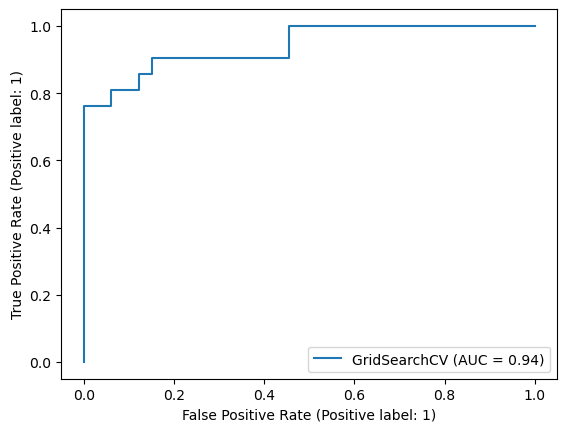

In [47]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

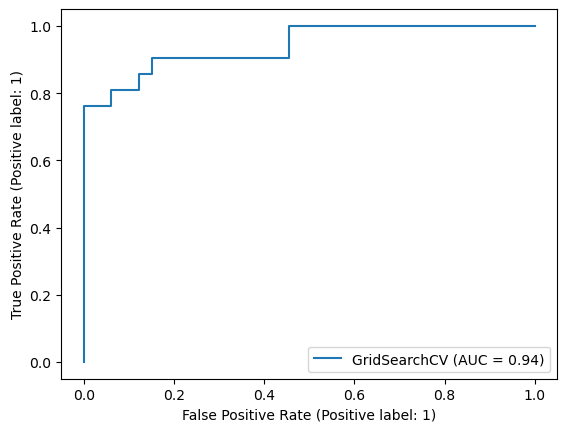

In [48]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [49]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[33  0]
 [ 5 16]]


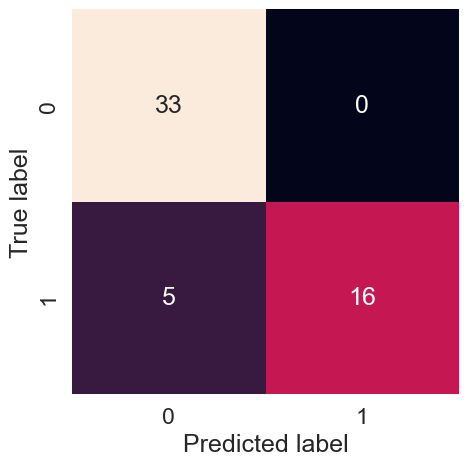

In [50]:
sns.set(font_scale=1.5) 
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

In [51]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [53]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc.mean()

0.837037037037037

In [54]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision.mean()

0.8404338415207981

In [55]:
# Cross-validated recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall.mean()

0.7833333333333332

In [56]:
# Cross-validated f1
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1.mean()

0.8104702436016036

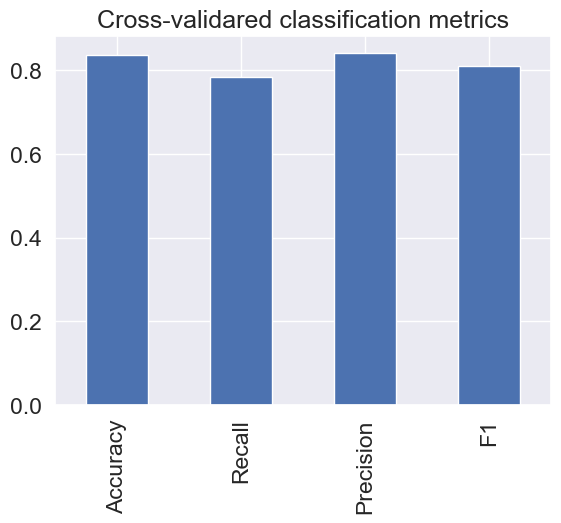

In [57]:
# Visualise cross-validated metrics
cv_metrics= pd.DataFrame({'Accuracy':cv_acc.mean(),
                        'Recall':cv_recall.mean(),
                        "Precision":cv_precision.mean(),
                        "F1":cv_f1.mean()},index=[0])
cv_metrics.T.plot.bar(title='Cross-validared classification metrics',legend=False);

In [58]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [59]:
# Check coef_
clf.coef_

array([[-0.04388018,  0.3667732 ,  0.43459075,  0.01154171,  0.00283705,
        -0.221834  ,  0.12422896, -0.03091633,  0.37517786,  0.46914544,
         0.15420385,  0.69811102,  0.35955031]])

In [60]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.04388017807704925,
 'sex': 0.36677320348188264,
 'cp': 0.43459074757049426,
 'trestbps': 0.011541714289800465,
 'chol': 0.002837045314448507,
 'fbs': -0.2218340039479521,
 'restecg': 0.12422896005992047,
 'thalach': -0.030916333273459173,
 'exang': 0.37517786216957183,
 'oldpeak': 0.4691454420683358,
 'slope': 0.1542038541017638,
 'ca': 0.6981110245722528,
 'thal': 0.35955031120214775}

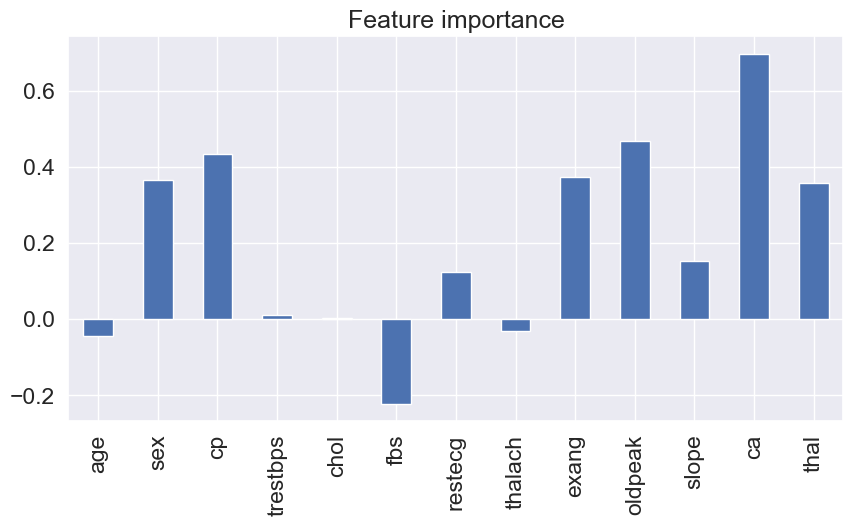

In [61]:
feature_importance=pd.DataFrame(feature_dict,index=[0])
feature_importance.T.plot.bar(figsize=(10,5),title='Feature importance', legend=False);

In [62]:
df.corr()

,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000000,0.273053,0.220056,-0.402215,0.194234,0.356081,0.212322
trestbps,0.273053,1.000000,0.173019,-0.039136,0.222800,0.085697,0.155383
chol,0.220056,0.173019,1.000000,-0.018739,0.027709,0.126541,0.118021
thalach,-0.402215,-0.039136,-0.018739,1.000000,-0.349045,-0.265333,-0.418514
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000,0.255005,0.417967
ca,0.356081,0.085697,0.126541,-0.265333,0.255005,1.000000,0.455336
target,0.212322,0.155383,0.118021,-0.418514,0.417967,0.455336,1.000000
